## 3.0  Analysis of Train and Test Datasets - String Types
> - In this notebook I analyze and summarize the `application_train`and `application_test` datasets' string or `object`types.
> The datasets have three types: `float64`, `int64`, and `object`.The `int64` and `float64` types are analyzed in a different notebook.

> - To more efficiently analyze both datasets I combined them into one dataframe and added a filter to later separate them.The `application_train`and `application_test` datasets includes all the same fields except the target variable.


> - The main objective in this notebook is to gain an understanding of the datasets using descriptive statistics and data visualizations.  After reviewing these statistics and data visualizations I will decide which fields should be included as features.  I also perform transformations on fields as deemed necessary. 


#### Analysis Summary:
> After analyzing the string type fields I decided to remove the fields that had a null or missing rate higher than 10%.  For the one field that had a null rate less than 10% I fill in the missing values with the most frequent value.  My analysis began with 16 string type fields and at the end I was left with 11.  These 11 fields will be treated as categorical features.

In [29]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

# import math
# from scipy import stats
# import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 3.1 Import Datasets And Prepare ABT
> - Import the train and test datasets combined using a utility helper module.
> - Create Activity Base Table (ABT) to group the fields by type.

In [31]:
dataset_all = utils.get_application_df()
dataset_all.dtypes.value_counts()

float64    71
int64      35
object     17
dtype: int64

In [32]:
dataset_all.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DATASET
0,100002,1.00,Cash loans,M,N,Y,0.00,"202,500.00","406,597.50","24,700.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,train
1,100003,0.00,Cash loans,F,N,N,0.00,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train
2,100004,0.00,Revolving loans,M,Y,Y,0.00,"67,500.00","135,000.00","6,750.00",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train
3,100006,0.00,Cash loans,F,N,Y,0.00,"135,000.00","312,682.50","29,686.50",...,0,0,0,nan,nan,nan,nan,nan,nan,train
4,100007,0.00,Cash loans,M,N,Y,0.00,"121,500.00","513,000.00","21,865.50",...,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,train


In [33]:
abt_all = utils.ABT(dataset_all)

In [34]:
#exclude the ['SK_ID_CURR','TARGET','DATASET'] fields from the ABT
other_table = abt_all.other_table
print("Total string types: {}".format(len(other_table)))
other_table 

Total string types: 16


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
NAME_CONTRACT_TYPE,1,356255,0,0.00,2,Cash loans,326537,0.92
CODE_GENDER,2,356255,0,0.00,3,F,235126,0.66
FLAG_OWN_CAR,3,356255,0,0.00,2,N,235235,0.66
FLAG_OWN_REALTY,4,356255,0,0.00,2,Y,246970,0.69
NAME_TYPE_SUITE,5,354052,2203,0.01,7,Unaccompanied,288253,0.81
NAME_INCOME_TYPE,6,356255,0,0.00,8,Working,183307,0.51
NAME_EDUCATION_TYPE,7,356255,0,0.00,5,Secondary / secondary special,252379,0.71
NAME_FAMILY_STATUS,8,356255,0,0.00,6,Married,228715,0.64
NAME_HOUSING_TYPE,9,356255,0,0.00,6,House / apartment,316513,0.89


In [35]:
# print description of each field in the string ABT
field_table = utils.FieldsNames()
field_table.print('application_{train|test}.csv',other_table.index.values.tolist()) 

1) ['NAME_CONTRACT_TYPE']: Identification if loan is cash or revolving
----------------------------------------
2) ['CODE_GENDER']: Gender of the client
----------------------------------------
3) ['FLAG_OWN_CAR']: Flag if the client owns a car
----------------------------------------
4) ['FLAG_OWN_REALTY']: Flag if client owns a house or flat
----------------------------------------
5) ['NAME_TYPE_SUITE']: Who was accompanying client when he was applying for the loan
----------------------------------------
6) ['NAME_INCOME_TYPE']: Clients income type (businessman, working, maternity leave,)
----------------------------------------
7) ['NAME_EDUCATION_TYPE']: Level of highest education the client achieved
----------------------------------------
8) ['NAME_FAMILY_STATUS']: Family status of the client
----------------------------------------
9) ['NAME_HOUSING_TYPE']: What is the housing situation of the client (renting, living with parents, ...)
----------------------------------------

### 3.2 Analyze Missing Values
> - Here I use a [missingno correlation heatmap](https://github.com/ResidentMario/missingno) to measures nullity correlation or how strongly the presence or absence of one variable affects the presence of another.
> - Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

#### Observations:
> The housing fields: `FONDKAPREMONT_MODE`, `HOUSETYPE_MODE`,`ALLSMATERIAL_MODE`and `MERGENCYSTATE_MODE`,  have high  Nullity correlation.


#### Conclusion:
> - Remove any fields that have missing values percentage higher than 10%.
> - Fill the fields with a missing percentange less than 10% with mode value.

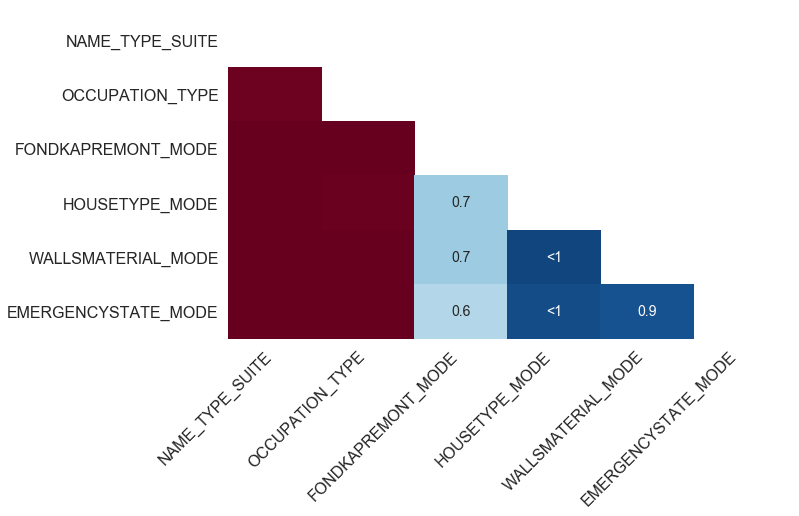

In [36]:
#get fields that have missing data
missing_string = other_table[other_table['na_%'] > 0.0].index.values.tolist()
msno.heatmap(dataset_all[missing_string], figsize=(10,6))
plt.show()

In [37]:
other_table_filter = abt_all.other_table_nan_filter(0.10)
print("Total reduced string types: {}".format(len(other_table_filter)))
other_table_filter


Total reduced string types: 11


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
NAME_CONTRACT_TYPE,1,356255,0,0.00,2,Cash loans,326537,0.92
CODE_GENDER,2,356255,0,0.00,3,F,235126,0.66
FLAG_OWN_CAR,3,356255,0,0.00,2,N,235235,0.66
FLAG_OWN_REALTY,4,356255,0,0.00,2,Y,246970,0.69
NAME_TYPE_SUITE,5,354052,2203,0.01,7,Unaccompanied,288253,0.81
NAME_INCOME_TYPE,6,356255,0,0.00,8,Working,183307,0.51
NAME_EDUCATION_TYPE,7,356255,0,0.00,5,Secondary / secondary special,252379,0.71
NAME_FAMILY_STATUS,8,356255,0,0.00,6,Married,228715,0.64
NAME_HOUSING_TYPE,9,356255,0,0.00,6,House / apartment,316513,0.89


In [38]:
#create new dataset with high missing fields removed
features =  ['SK_ID_CURR','TARGET','DATASET'] + other_table_filter.index.values.tolist()
new_dataset = dataset_all[features].copy()

#fill na for 
#lets fill the missing values in the 'NAME_TYPE_SUITE' with the most frequent value
freq = other_table_filter.loc['NAME_TYPE_SUITE']['top'] 
new_dataset['NAME_TYPE_SUITE'].fillna(freq,inplace=True)
new_dataset.head()

,SK_ID_CURR,TARGET,DATASET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1.00,train,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,100003,0.00,train,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,100004,0.00,train,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,100006,0.00,train,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,100007,0.00,train,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


In [39]:
#create new ABT
new_abt = utils.ABT(new_dataset)
other_table_adjusted = new_abt.other_table
other_table_adjusted

,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
NAME_CONTRACT_TYPE,1,356255,0,0.00,2,Cash loans,326537,0.92
CODE_GENDER,2,356255,0,0.00,3,F,235126,0.66
FLAG_OWN_CAR,3,356255,0,0.00,2,N,235235,0.66
FLAG_OWN_REALTY,4,356255,0,0.00,2,Y,246970,0.69
NAME_TYPE_SUITE,5,356255,0,0.00,7,Unaccompanied,290456,0.82
NAME_INCOME_TYPE,6,356255,0,0.00,8,Working,183307,0.51
NAME_EDUCATION_TYPE,7,356255,0,0.00,5,Secondary / secondary special,252379,0.71
NAME_FAMILY_STATUS,8,356255,0,0.00,6,Married,228715,0.64
NAME_HOUSING_TYPE,9,356255,0,0.00,6,House / apartment,316513,0.89


### 3.3 Plot Bar Graph 
> - Plot the count of each value as a bar graph.
> - Due to its category size the`ORGANIZATION_TYPE` field is plotted seperately. 

#### Observations:
> - Most of the loans types are cash loans.
> - Females make up the majority of applicants.
> - The majority of applicants are married.
> - Most of the applicants owned real estate property.

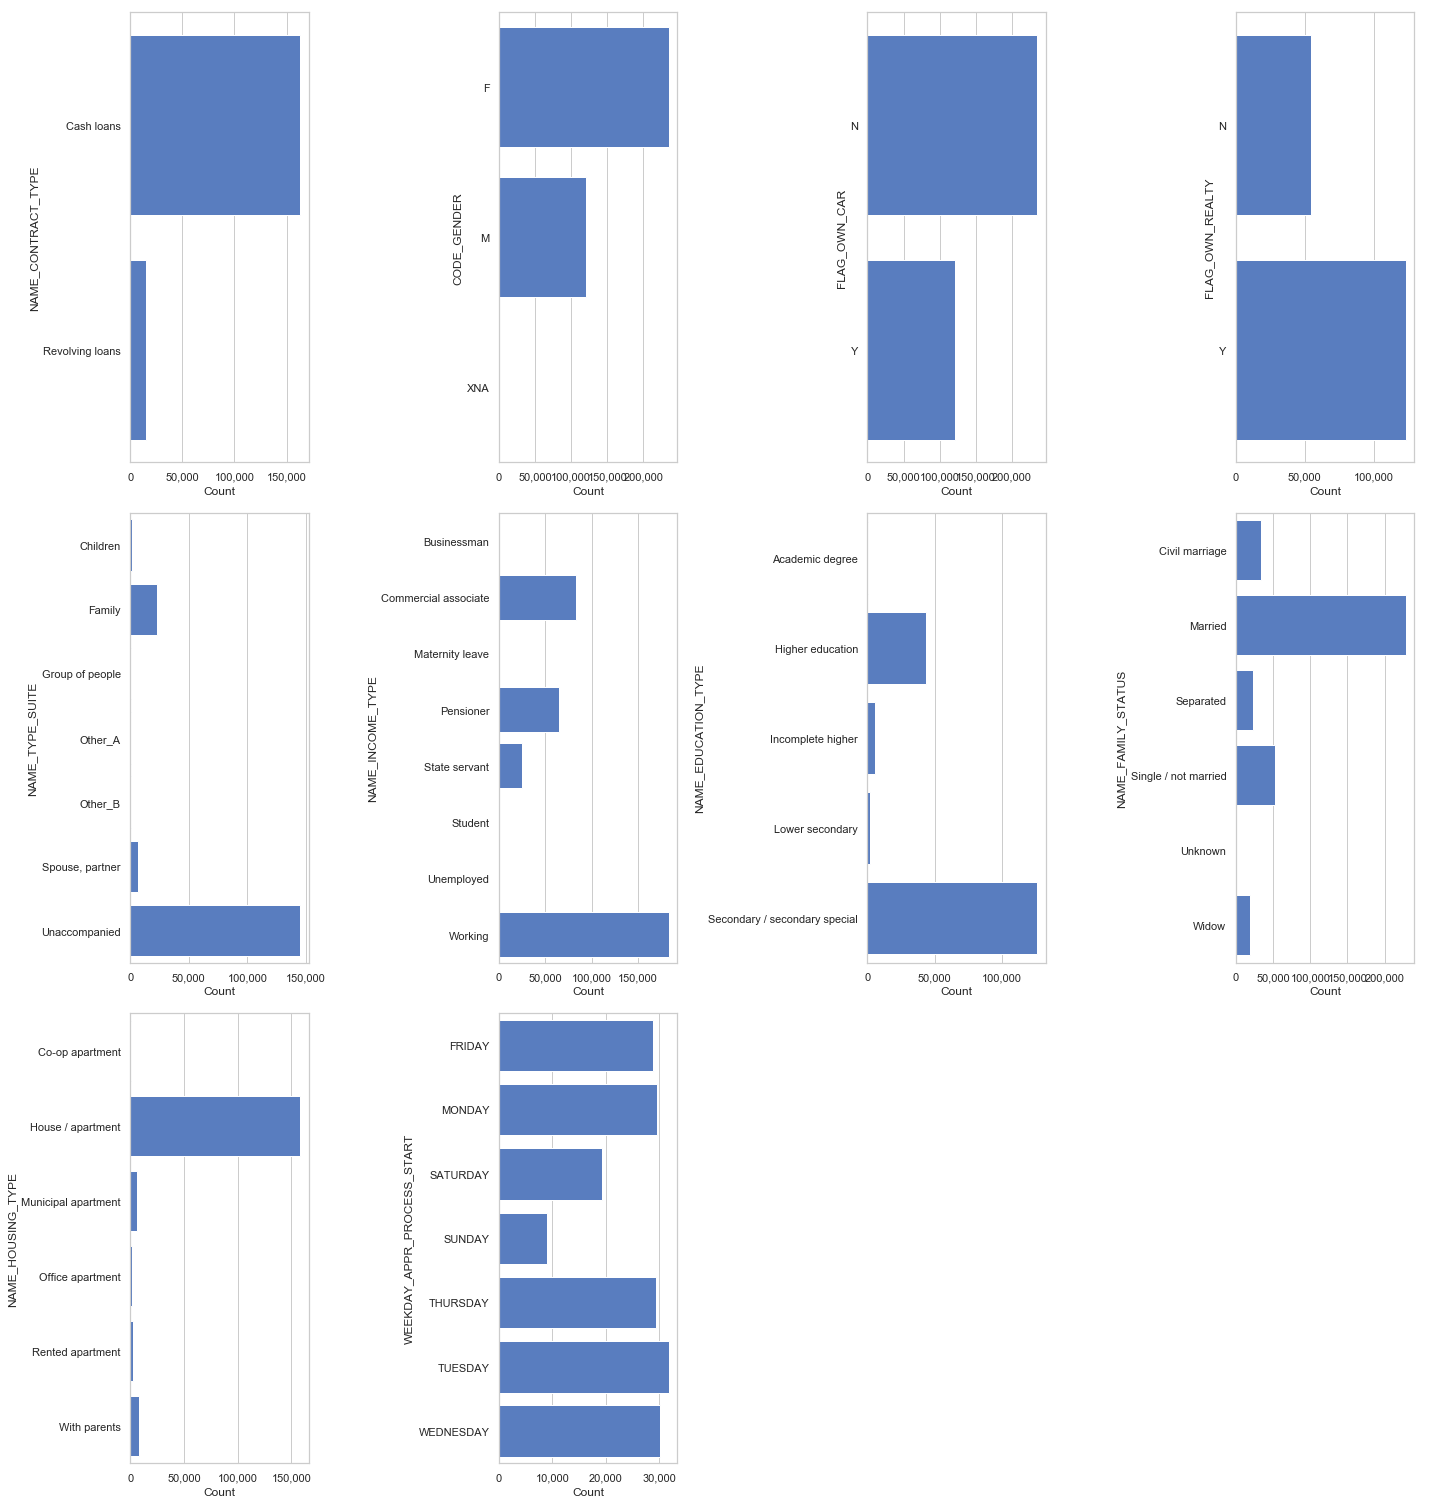

In [40]:
# lets plot the fields but excluded 'ORGANIZATION_TYPE'  since it has a lot of different values
# 'ORGANIZATION_TYPE' will be plotted seperately
plot_fields = [f for f in other_table_adjusted.index.values if f not in 'ORGANIZATION_TYPE']
utils.plot_hbar(plot_fields,new_dataset,w=20,h=7)

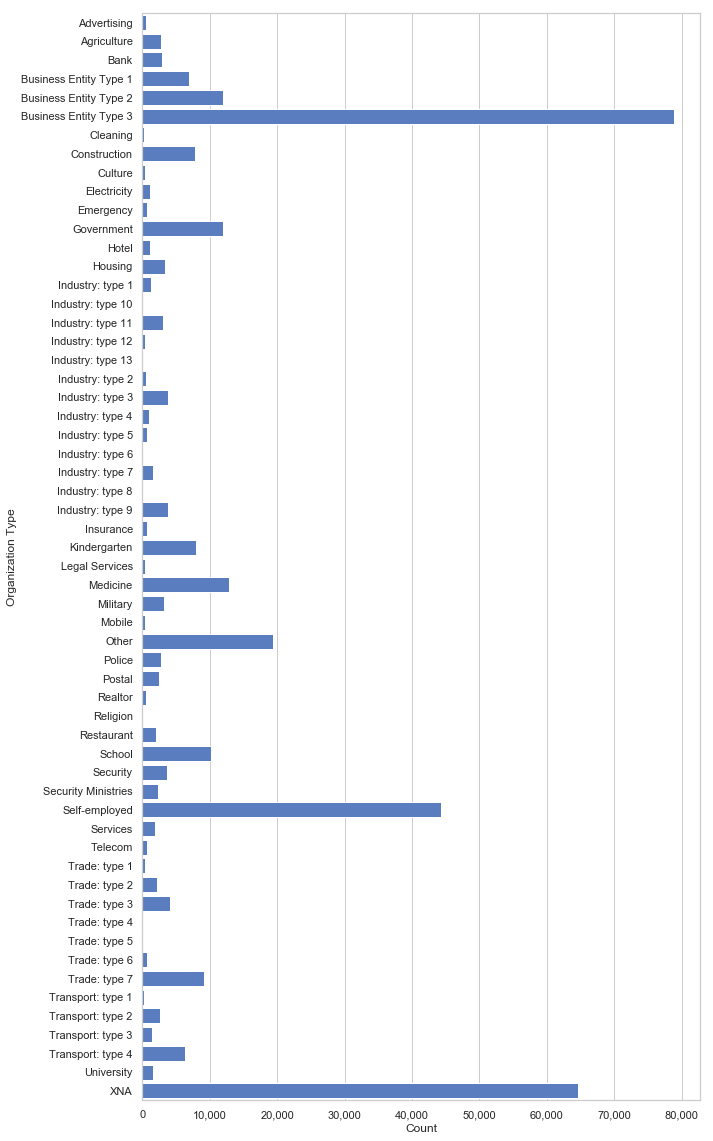

In [41]:
#plot 'ORGANIZATION_TYPE' 
f, ax = plt.subplots(figsize=(10, 20))

cnt = new_dataset.groupby('ORGANIZATION_TYPE').size()
sns.barplot(y=cnt.index,x=cnt.values, color="b", ax=ax)
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

ax.set_xlabel('Count')
ax.set_ylabel('Organization Type')

plt.show()

### 3.4 Save Fields To File

In [42]:
new_dataset[features].to_csv('data_pre_processed/1_3_applications_string_types.csv',index=False)
print("The file was saved.")

The file was saved.
